In [2]:


# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

In [3]:
file_path = r'D:\New folder\01 Call-Center-Dataset.csv'
df = pd.read_csv(file_path)

In [4]:
df

,Call Id,Agent,Date,Time,Topic,Answered (Y/N),Resolved,Speed of answer in seconds,AvgTalkDuration,Satisfaction rating
0,ID0001,Diane,2021-01-01,9:12:58,Contract related,Y,Y,109.0,0:02:23,3.0
1,ID0002,Becky,2021-01-01,9:12:58,Technical Support,Y,N,70.0,0:04:02,3.0
2,ID0003,Stewart,2021-01-01,9:47:31,Contract related,Y,Y,10.0,0:02:11,3.0
3,ID0004,Greg,2021-01-01,9:47:31,Contract related,Y,Y,53.0,0:00:37,2.0
4,ID0005,Becky,2021-01-01,10:00:29,Payment related,Y,Y,95.0,0:01:00,3.0
...,...,...,...,...,...,...,...,...,...,...
4995,ID4996,Jim,2021-03-31,16:37:55,Payment related,Y,Y,22.0,0:05:40,1.0
4996,ID4997,Diane,2021-03-31,16:45:07,Payment related,Y,Y,100.0,0:03:16,3.0
4997,ID4998,Diane,2021-03-31,16:53:46,Payment related,Y,Y,84.0,0:01:49,4.0
4998,ID4999,Jim,2021-03-31,17:02:24,Streaming,Y,Y,98.0,0:00:58,5.0


In [5]:
df.describe()

,Speed of answer in seconds,Satisfaction rating
count,4054.000000,4054.000000
mean,67.520720,3.403552
std,33.592872,1.212220
min,10.000000,1.000000
25%,39.000000,3.000000
50%,68.000000,3.000000
75%,97.000000,4.000000
max,125.000000,5.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Call Id                     5000 non-null   object 
 1   Agent                       5000 non-null   object 
 2   Date                        5000 non-null   object 
 3   Time                        5000 non-null   object 
 4   Topic                       5000 non-null   object 
 5   Answered (Y/N)              5000 non-null   object 
 6   Resolved                    5000 non-null   object 
 7   Speed of answer in seconds  4054 non-null   float64
 8   AvgTalkDuration             4054 non-null   object 
 9   Satisfaction rating         4054 non-null   float64
dtypes: float64(2), object(8)
memory usage: 390.8+ KB


In [7]:
df.shape

(5000, 10)

In [8]:
# Preprocess the data
# Convert 'AvgTalkDuration' to seconds
df['AvgTalkDuration'] = pd.to_timedelta(df['AvgTalkDuration']).dt.total_seconds()

df

,Call Id,Agent,Date,Time,Topic,Answered (Y/N),Resolved,Speed of answer in seconds,AvgTalkDuration,Satisfaction rating
0,ID0001,Diane,2021-01-01,9:12:58,Contract related,Y,Y,109.0,143.0,3.0
1,ID0002,Becky,2021-01-01,9:12:58,Technical Support,Y,N,70.0,242.0,3.0
2,ID0003,Stewart,2021-01-01,9:47:31,Contract related,Y,Y,10.0,131.0,3.0
3,ID0004,Greg,2021-01-01,9:47:31,Contract related,Y,Y,53.0,37.0,2.0
4,ID0005,Becky,2021-01-01,10:00:29,Payment related,Y,Y,95.0,60.0,3.0
...,...,...,...,...,...,...,...,...,...,...
4995,ID4996,Jim,2021-03-31,16:37:55,Payment related,Y,Y,22.0,340.0,1.0
4996,ID4997,Diane,2021-03-31,16:45:07,Payment related,Y,Y,100.0,196.0,3.0
4997,ID4998,Diane,2021-03-31,16:53:46,Payment related,Y,Y,84.0,109.0,4.0
4998,ID4999,Jim,2021-03-31,17:02:24,Streaming,Y,Y,98.0,58.0,5.0


In [9]:
# Convert categorical variables to numerical using Label Encoding
le = LabelEncoder()
df['Answered (Y/N)'] = le.fit_transform(df['Answered (Y/N)'])
df['Resolved'] = le.fit_transform(df['Resolved'])

df

,Call Id,Agent,Date,Time,Topic,Answered (Y/N),Resolved,Speed of answer in seconds,AvgTalkDuration,Satisfaction rating
0,ID0001,Diane,2021-01-01,9:12:58,Contract related,1,1,109.0,143.0,3.0
1,ID0002,Becky,2021-01-01,9:12:58,Technical Support,1,0,70.0,242.0,3.0
2,ID0003,Stewart,2021-01-01,9:47:31,Contract related,1,1,10.0,131.0,3.0
3,ID0004,Greg,2021-01-01,9:47:31,Contract related,1,1,53.0,37.0,2.0
4,ID0005,Becky,2021-01-01,10:00:29,Payment related,1,1,95.0,60.0,3.0
...,...,...,...,...,...,...,...,...,...,...
4995,ID4996,Jim,2021-03-31,16:37:55,Payment related,1,1,22.0,340.0,1.0
4996,ID4997,Diane,2021-03-31,16:45:07,Payment related,1,1,100.0,196.0,3.0
4997,ID4998,Diane,2021-03-31,16:53:46,Payment related,1,1,84.0,109.0,4.0
4998,ID4999,Jim,2021-03-31,17:02:24,Streaming,1,1,98.0,58.0,5.0


In [10]:
# Drop rows with missing values
df = df.dropna()

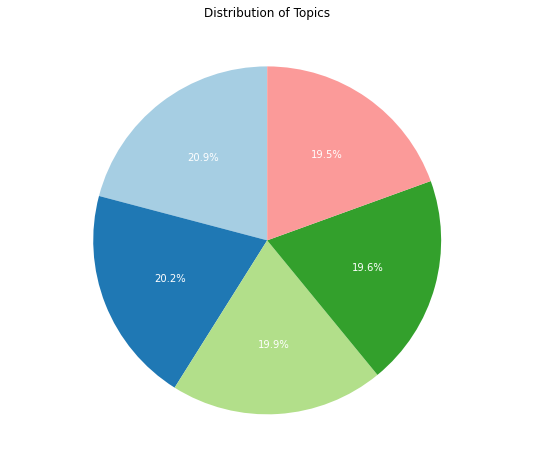

In [11]:
import matplotlib.pyplot as plt

# Calculate percentages for each topic
topic_percentages = df['Topic'].value_counts(normalize=True) * 100

# Create a pie chart with white labels
plt.figure(figsize=(8, 8))
patches, texts, autotexts = plt.pie(topic_percentages, labels=topic_percentages.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)

# Set text color to white
for text in texts + autotexts:
    text.set_color('white')

plt.title('Distribution of Topics')
plt.show()


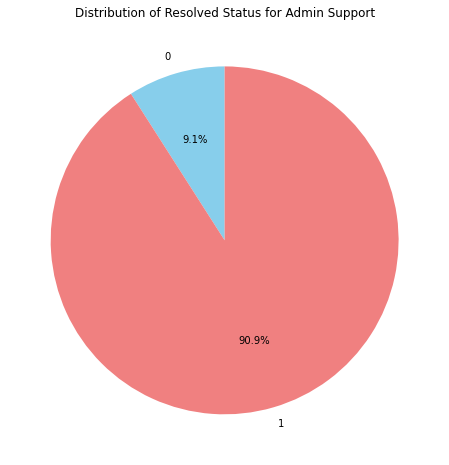

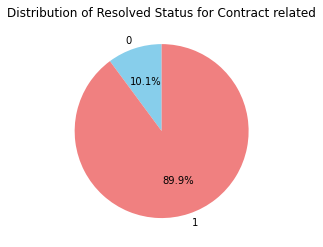

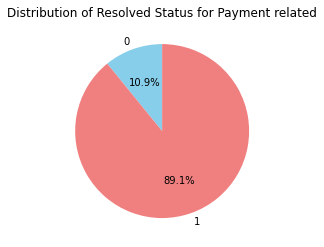

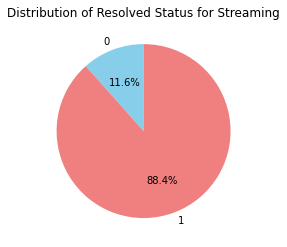

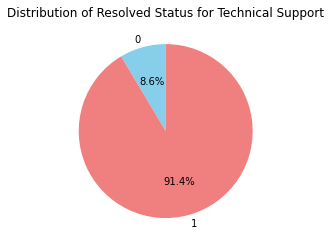

In [12]:
import matplotlib.pyplot as plt

# Count the number of resolved and unresolved cases for each topic
topic_resolved_counts = df.groupby(['Topic', 'Resolved']).size().unstack(fill_value=0)

# Create a pie plot for each topic
plt.figure(figsize=(12, 8))
colors = ['skyblue', 'lightcoral']

for topic in topic_resolved_counts.index:
    plt.pie(topic_resolved_counts.loc[topic], labels=topic_resolved_counts.columns, autopct='%1.1f%%', colors=colors, startangle=90)
    plt.title(f'Distribution of Resolved Status for {topic}')
    plt.show()


In [13]:
df['Agent'] = le.fit_transform(df['Agent'])
df

<ipython-input-13-686f293de383>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Agent'] = le.fit_transform(df['Agent'])


,Call Id,Agent,Date,Time,Topic,Answered (Y/N),Resolved,Speed of answer in seconds,AvgTalkDuration,Satisfaction rating
0,ID0001,2,2021-01-01,9:12:58,Contract related,1,1,109.0,143.0,3.0
1,ID0002,0,2021-01-01,9:12:58,Technical Support,1,0,70.0,242.0,3.0
2,ID0003,7,2021-01-01,9:47:31,Contract related,1,1,10.0,131.0,3.0
3,ID0004,3,2021-01-01,9:47:31,Contract related,1,1,53.0,37.0,2.0
4,ID0005,0,2021-01-01,10:00:29,Payment related,1,1,95.0,60.0,3.0
...,...,...,...,...,...,...,...,...,...,...
4990,ID4991,7,2021-03-31,13:46:34,Streaming,1,1,73.0,386.0,1.0
4995,ID4996,4,2021-03-31,16:37:55,Payment related,1,1,22.0,340.0,1.0
4996,ID4997,2,2021-03-31,16:45:07,Payment related,1,1,100.0,196.0,3.0
4997,ID4998,2,2021-03-31,16:53:46,Payment related,1,1,84.0,109.0,4.0


In [14]:
# Select features and target variable
features = ['Speed of answer in seconds', 'AvgTalkDuration', 'Answered (Y/N)', 'Resolved']
target = 'Satisfaction rating'

In [15]:
# Create a dictionary to store models for each agent
agent_models = {}


In [16]:
# replace missing values by mean
imputer = SimpleImputer(strategy='mean')

In [17]:
# Iterate over unique agents and train a model for each
for agent in df['Agent'].unique():
    agent_data = df[df['Agent'] == agent]
    X_agent = agent_data[features]
    y_agent = agent_data[target]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_agent, y_agent, test_size=0.2, random_state=42)

    # Handle missing values in the training set
    X_train = imputer.fit_transform(X_train)

    # Build the model (Random Forest Regressor as an example)
    model = RandomForestRegressor(random_state=42)
    model.fit(X_train, y_train)

    # Save the model for the agent
    agent_models[agent] = model

    # Handle missing values in the test set
    X_test = imputer.transform(X_test)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    print(f'Mean Squared Error for {le.inverse_transform([agent])[0]}: {mse:.2f}')  
    
    #Prints the MSE for the current agent, converting the encoded agent back to its original label using le.inverse_transform.
    #MSE is used as a measure of how well each agent-specific model is performing on the test set.


Mean Squared Error for Diane: 1.88
Mean Squared Error for Becky: 1.72
Mean Squared Error for Stewart: 1.83
Mean Squared Error for Greg: 1.70
Mean Squared Error for Jim: 2.10
Mean Squared Error for Joe: 1.73
Mean Squared Error for Martha: 1.58
Mean Squared Error for Dan: 1.82


MSE evaluate the performance of a regression model, such as the RandomForestRegressor used in the code. It measures the average squared difference between the predicted values and the actual values. 

In [18]:
# Function to predict efficiency for a particular agent and calculate MSE
def predict_efficiency(agent_name):
    # Check if the agent name is valid
    if agent_name not in le.classes_:  # Holds the label for each class.
        print(f"Error: Invalid agent name {agent_name}")
        return

    # Encode the agent name
    encoded_agent_name = le.transform([agent_name])[0]

    # Check if the model exists for the agent
    if encoded_agent_name not in agent_models:
        print(f"Error: No model found for agent {agent_name}")
        return

    # Filter data for the specified agent
    agent_data = df[df['Agent'] == encoded_agent_name]

    # Calculate average values for input features
    avg_speed_of_answer = agent_data['Speed of answer in seconds'].mean()
    avg_avg_talk_duration = agent_data['AvgTalkDuration'].mean()
    avg_answered = agent_data['Answered (Y/N)'].mean()
    avg_resolved = agent_data['Resolved'].mean()

    # Create a feature vector for prediction
    input_features = [avg_speed_of_answer, avg_avg_talk_duration, avg_answered, avg_resolved]

    # Reshape the input features to match the model's expected input format
    input_features = [input_features]

    # Handle missing values in the input features
    input_features = imputer.transform(input_features)

    # Use the corresponding pre-trained model to predict efficiency
    predicted_efficiency_scaled = agent_models[encoded_agent_name].predict(input_features)[0]

    # Extract scalar value and round
    predicted_efficiency_rounded = round(float(predicted_efficiency_scaled), 2)

    # Make predictions on all samples in the agent's dataset
    all_predictions = agent_models[encoded_agent_name].predict(agent_data[features])

    # Calculate Mean Squared Error (MSE)
    mse = mean_squared_error(agent_data[target], all_predictions)

    print(f"Predicted efficiency for agent {agent_name}: {predicted_efficiency_rounded}")
    print(f"Mean Squared Error: {mse:.2f}")

# Example usage:
agent_name_to_predict = 'Diane'  # Replace with the agent name you want to predict
predict_efficiency(agent_name_to_predict)


Predicted efficiency for agent Diane: 2.49
Mean Squared Error: 0.58


In [19]:
from sklearn.linear_model import LinearRegression

# Function to predict efficiency for a particular agent and calculate MSE
def predict_efficiency(agent_name):
    # Check if the agent name is valid
    if agent_name not in le.classes_:
        print(f"Error: Invalid agent name {agent_name}")
        return

    # Encode the agent name
    encoded_agent_name = le.transform([agent_name])[0]

    # Check if the model exists for the agent
    if encoded_agent_name not in agent_models:
        print(f"Error: No model found for agent {agent_name}")
        return

    # Filter data for the specified agent
    agent_data = df[df['Agent'] == encoded_agent_name]

    # Calculate average values for input features
    avg_speed_of_answer = agent_data['Speed of answer in seconds'].mean()
    avg_avg_talk_duration = agent_data['AvgTalkDuration'].mean()
    avg_answered = agent_data['Answered (Y/N)'].mean()
    avg_resolved = agent_data['Resolved'].mean()

    # Create a feature vector for prediction
    input_features = [avg_speed_of_answer, avg_avg_talk_duration, avg_answered, avg_resolved]

    # Reshape the input features to match the model's expected input format
    input_features = [input_features]

    # Handle missing values in the input features
    input_features = imputer.transform(input_features)

    # Use the corresponding pre-trained LinearRegression model to predict efficiency
    predicted_efficiency_scaled = agent_models[encoded_agent_name].predict(input_features)[0]

    # Extract scalar value and round
    predicted_efficiency_rounded = round(float(predicted_efficiency_scaled), 2)

    # Make predictions on all samples in the agent's dataset
    all_predictions = agent_models[encoded_agent_name].predict(agent_data[features])

    # Calculate Mean Squared Error (MSE)
    mse = mean_squared_error(agent_data[target], all_predictions)

    print(f"Predicted efficiency for agent {agent_name}: {predicted_efficiency_rounded}")
    print(f"Mean Squared Error: {mse:.2f}")

# Example usage:
agent_name_to_predict = 'Diane'  # Replace with the agent name you want to predict
predict_efficiency(agent_name_to_predict)


Predicted efficiency for agent Diane: 2.49
Mean Squared Error: 0.58


In [20]:
# Function to predict efficiency for a given set of parameters and agent name
def predict_efficiency_with_parameters(agent_name, speed_of_answer, avg_talk_duration, answered, resolved):
    # Check if the agent name is valid
    if agent_name not in le.classes_:
        print(f"Error: Invalid agent name {agent_name}")
        return

    # Encode the agent name
    encoded_agent_name = le.transform([agent_name])[0]

    # Check if the model exists for the agent
    if encoded_agent_name not in agent_models:
        print(f"Error: No model found for agent {agent_name}")
        return

    # Create a feature vector for prediction
    input_features = [speed_of_answer, avg_talk_duration, answered, resolved]

    # Reshape the input features to match the model's expected input format
    input_features = [input_features]

    # Handle missing values in the input features
    input_features = imputer.transform(input_features)

    # Use the corresponding pre-trained regression model to predict efficiency
    predicted_efficiency_scaled = agent_models[encoded_agent_name].predict(input_features)[0]

    # Extract scalar value and round
    predicted_efficiency_rounded = round(float(predicted_efficiency_scaled), 2)

    print(f"Predicted efficiency for agent {agent_name} with parameters:")
    print(f"Speed of Answer: {speed_of_answer}")
    print(f"Avg Talk Duration: {avg_talk_duration}")
    print(f"Answered: {answered}")
    print(f"Resolved: {resolved}")
    print(f"Prediction: {predicted_efficiency_rounded}")

# Example usage:
agent_name_to_predict = 'Diane'
speed_of_answer_input = 90
avg_talk_duration_input = 200
answered_input = 1
resolved_input = 1

predict_efficiency_with_parameters(agent_name_to_predict, speed_of_answer_input, avg_talk_duration_input, answered_input, resolved_input)


Predicted efficiency for agent Diane with parameters:
Speed of Answer: 90
Avg Talk Duration: 200
Answered: 1
Resolved: 1
Prediction: 2.94
